# XOR Exercise
| x1      | x2 | Label |
| ----------- | ----------- | ----------- |
| 0      | 0       | 0       |
| 0   | 1        |1         |
| 1      | 0       | 1       |
| 1   | 1        |1         |

<br><br>
This exercise was inspired by the following article:<br>[Neural Network Implementation for XOR Gate Using Numpy](https://medium.com/analytics-vidhya/neural-network-implementation-for-xor-gate-using-numpy-59eca77b54cc)

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

## Create Dataset

In [2]:
X=np.vstack(([0,0],[0,1],[1,0],[1,1]))
t=np.array([0,1,1,0]).reshape(-1,1)
print(f'Train Features  : \n{X}\n\nLabels: \n{t}')

Train Features  : 
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Labels: 
[[0]
 [1]
 [1]
 [0]]


## Activation Function

In [3]:
def sigmoid(x):
  return (1/(1+np.exp(-x)))

## Loss Function

In [4]:
def mean_squared_error(y, t):
  return (1/4*np.sum((y-t)**2))

## Hyper Parameters

In [5]:
alpha=0.1
epochs = 10000
loss_list, epochs_list=[],[]

## Weights Initialization

In [6]:
W1=np.random.rand(2,16)
W2=np.random.rand(16,1)
print(W1.shape,'\n',W2.shape)

(2, 16) 
 (16, 1)


## Train NN

In [7]:
for i in range(epochs):

  # TODO :  Forward propagation  
  z=sigmoid(np.dot(X,W1))
  y=sigmoid(np.dot(z,W2))

  # TODO: Compute loss
  loss=mean_squared_error(y, t)

  # TODO: Back propagation
  dz = (y-t)
  dz = dz*y*(1-y)
  dW2 = 2*(np.dot(y.T,dz))
  dW1 = 2*np.dot(X.T,np.dot(dz,W2.T)*z*(1-z))

  # TODO: Update weights
  W2=W2-alpha*dW2
  W1=W1-alpha*dW1

  loss_list.append(loss)
  epochs_list.append(i)

## Loss Visualization

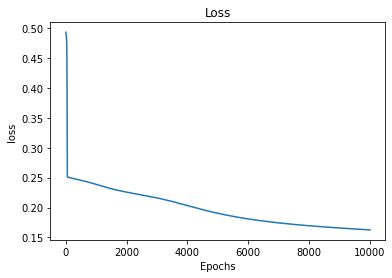

In [8]:
plt.title('Loss')
plt.xlabel("Epochs")
plt.ylabel("loss")

plt.plot(epochs_list,loss_list)
plt.show()

## Test model performance
We will impliment the "Forward" with the trained weights.

In [9]:
X_test=np.vstack(([0,0],[0,1],[1,0],[1,1]))
y_test=np.array([0,1,1,0])

# TODO :  Forward propagation  
z_test = sigmoid(np.dot(X_test,W1))
y_pred = sigmoid(np.dot(z_test,W2))
print(y_pred.T)

[[0.49431758 0.64847155 0.66302014 0.41060696]]


### Check your predictions against the test's labels

In [10]:
predictions = np.zeros((1,y_test.shape[0]))

for i in range(y_test.shape[0]):
  if (y_pred[i][0] > 0.5): 
    predictions[0][i] = 1
print(f'Our predictions{predictions}\nLabls:{y_test}')

Our predictions[[0. 1. 1. 0.]]
Labls:[0 1 1 0]


### Show Classification Evaluation Metrics

In [11]:
cm = confusion_matrix(predictions.T, y_test.T)
print('Accuracy Score : ', accuracy_score(predictions.T, y_test.T))
print('Confusion Matrix : \n', cm)

Accuracy Score :  1.0
Confusion Matrix : 
 [[2 0]
 [0 2]]


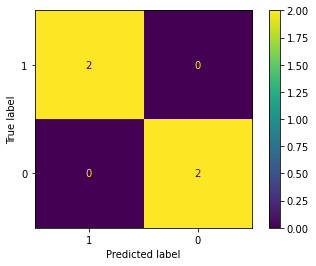

In [12]:
ConfusionMatrixDisplay(cm, display_labels=["1", "0"]).plot()